[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/regression.ipynb)

Automatically created module for IPython interactive environment
training score : 0.995 (multinomial)
training score : 0.976 (ovr)


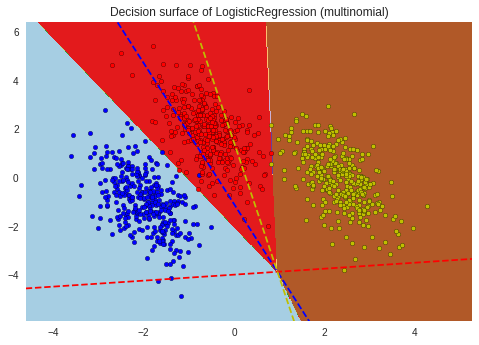

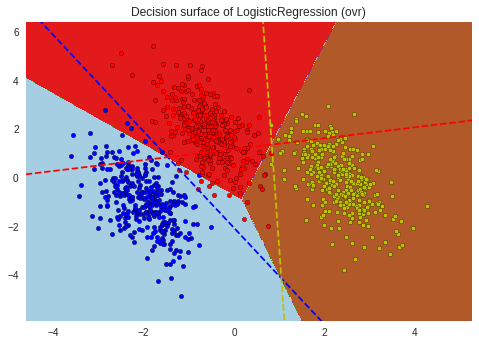

In [1]:
#Plot multinomial and One-vs-Rest Logistic Regression
print(__doc__)
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

Automatically created module for IPython interactive environment
Dataset 20newsgroup, train_samples=9000, n_features=130107, n_classes=20
[model=One versus Rest, solver=saga] Number of epochs: 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[model=One versus Rest, solver=saga] Number of epochs: 3
Test accuracy for model ovr: 0.7410
% non-zero coefficients for model ovr, per class:
 [0.27054655 0.66330021 0.80395367 0.73247404 0.67713497 0.73477984
 0.40889422 0.48959702 1.01301237 0.56261385 0.60104376 0.332803
 0.7094161  0.85083816 0.56876263 0.65715142 0.64408525 0.81163965
 0.44271254 0.41120001]
Run time (3 epochs) for model ovr:3.34
[model=Multinomial, solver=saga] Number of epochs: 1
[model=Multinomial, solver=saga] Number of epochs: 3
[model=Multinomial, solver=saga] Number of epochs: 7
Test accuracy for model multinomial: 0.7450
% non-zero coefficients for model multinomial, per class:
 [0.13296748 0.11759552 0.13296748 0.13988486 0.1268187  0.16140561
 0.15218243 0.09069458 0.07762841 0.12143851 0.14910804 0.10837234
 0.18830655 0.1245129  0.168323   0.21828188 0.11605832 0.07839701
 0.06917383 0.15602543]
Run time (7 epochs) for model multinomial:3.42
Example run in 35.339 s


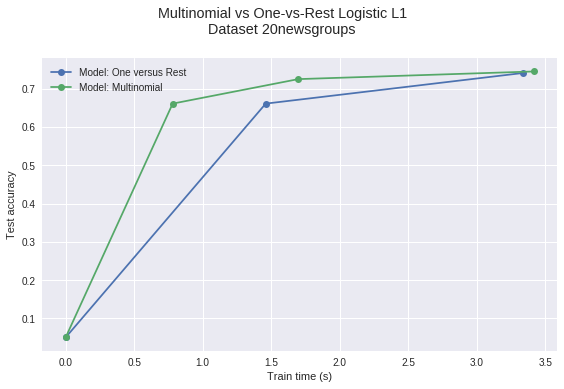

In [2]:
#Multiclass sparse logisitic regression on newgroups20
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

print(__doc__)
# Author: Arthur Mensch

t0 = time.clock()

# We use SAGA solver
solver = 'saga'

# Turn down for faster run time
n_samples = 10000

# Memorized fetch_rcv1 for faster access
dataset = fetch_20newsgroups_vectorized('all')
X = dataset.data
y = dataset.target
X = X[:n_samples]
y = y[:n_samples]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)
train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print('Dataset 20newsgroup, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 3]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 3, 7]}}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        print('[model=%s, solver=%s] Number of epochs: %s' %
              (model_params['name'], solver, this_max_iter))
        lr = LogisticRegression(solver=solver,
                                multi_class=model,
                                C=1,
                                penalty='l1',
                                fit_intercept=True,
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = time.clock()
        lr.fit(X_train, y_train)
        train_time = time.clock() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]['times'] = times
    models[model]['densities'] = densities
    models[model]['accuracies'] = accuracies
    print('Test accuracy for model %s: %.4f' % (model, accuracies[-1]))
    print('%% non-zero coefficients for model %s, '
          'per class:\n %s' % (model, densities[-1]))
    print('Run time (%i epochs) for model %s:'
          '%.2f' % (model_params['iters'][-1], model, times[-1]))

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]['name']
    times = models[model]['times']
    accuracies = models[model]['accuracies']
    ax.plot(times, accuracies, marker='o',
            label='Model: %s' % name)
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.suptitle('Multinomial vs One-vs-Rest Logistic L1\n'
             'Dataset %s' % '20newsgroups')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = time.clock() - t0
print('Example run in %.3f s' % run_time)
plt.show()

Automatically created module for IPython interactive environment


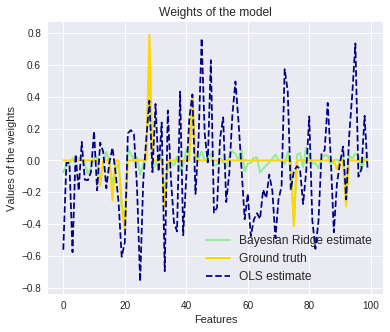

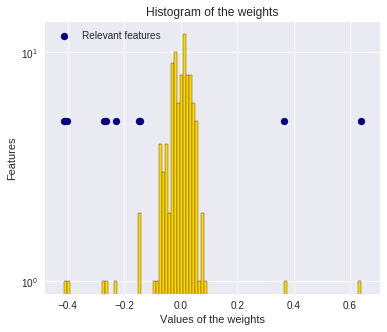

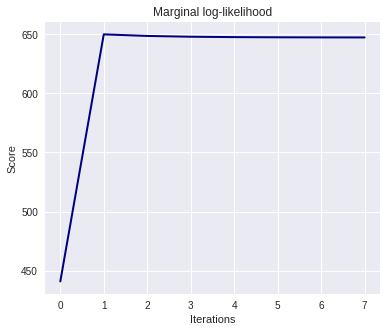

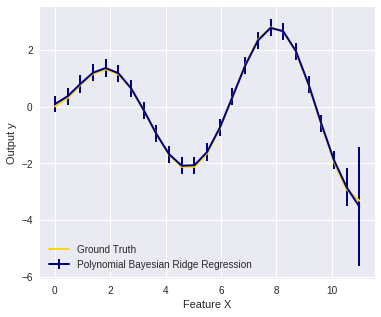

In [4]:
#Bayesian Ridge Regression
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression

# #############################################################################
# Generating simulated data with Gaussian weights
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weights with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

# #############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='lightgreen', linewidth=lw,
         label="Bayesian Ridge estimate")
plt.plot(w, color='gold', linewidth=lw, label="Ground truth")
plt.plot(ols.coef_, color='navy', linestyle='--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='gold', log=True,
         edgecolor='black')
plt.scatter(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
            color='navy', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="upper left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=lw)
plt.ylabel("Score")
plt.xlabel("Iterations")


# Plotting some predictions for polynomial regression
def f(x, noise_amount):
    y = np.sqrt(x) * np.sin(x)
    noise = np.random.normal(0, 1, len(x))
    return y + noise_amount * noise


degree = 10
X = np.linspace(0, 10, 100)
y = f(X, noise_amount=0.1)
clf_poly = BayesianRidge()
clf_poly.fit(np.vander(X, degree), y)

X_plot = np.linspace(0, 11, 25)
y_plot = f(X_plot, noise_amount=0)
y_mean, y_std = clf_poly.predict(np.vander(X_plot, degree), return_std=True)
plt.figure(figsize=(6, 5))
plt.errorbar(X_plot, y_mean, y_std, color='navy',
             label="Polynomial Bayesian Ridge Regression", linewidth=lw)
plt.plot(X_plot, y_plot, color='gold', linewidth=lw,
         label="Ground Truth")
plt.ylabel("Output y")
plt.xlabel("Feature X")
plt.legend(loc="lower left")
plt.show()

Automatically created module for IPython interactive environment


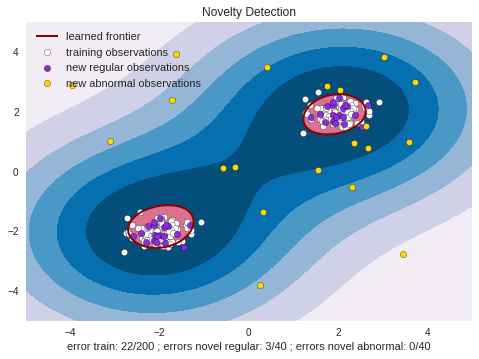

In [7]:
#One-class SVM with non-linear kernel
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

Automatically created module for IPython interactive environment


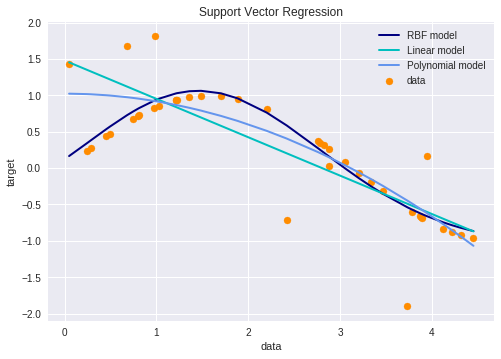

In [5]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Automatically created module for IPython interactive environment
Corr(X)
[[ 1.    0.47  0.09  0.03]
 [ 0.47  1.   -0.07 -0.  ]
 [ 0.09 -0.07  1.    0.5 ]
 [ 0.03 -0.    0.5   1.  ]]
Corr(Y)
[[ 1.    0.55 -0.    0.  ]
 [ 0.55  1.    0.09  0.04]
 [-0.    0.09  1.    0.51]
 [ 0.    0.04  0.51  1.  ]]


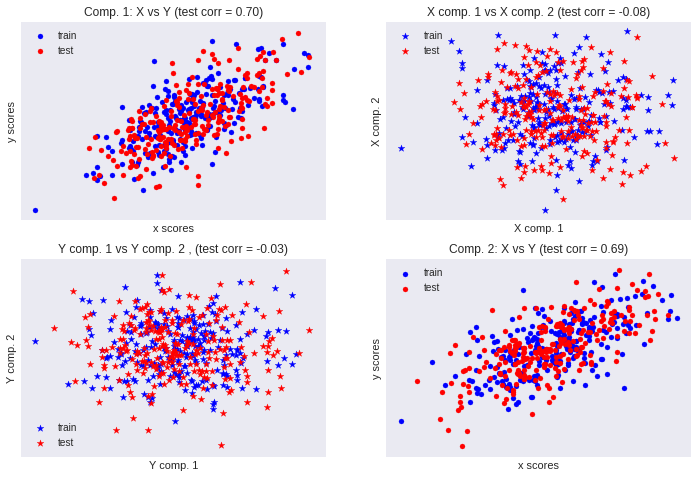

True B (such that: Y = XB + Err)
[[1 1 1]
 [2 2 2]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Estimated B
[[ 1.   0.9  1. ]
 [ 2.   1.9  2. ]
 [ 0.   0.  -0.1]
 [ 0.   0.  -0. ]
 [ 0.   0.   0. ]
 [-0.  -0.   0. ]
 [-0.   0.   0. ]
 [ 0.   0.   0. ]
 [-0.1 -0.  -0. ]
 [-0.   0.   0. ]]
Estimated betas
[[ 1.]
 [ 2.]
 [ 0.]
 [-0.]
 [-0.]
 [ 0.]
 [-0.]
 [-0.]
 [-0.]
 [ 0.]]


In [6]:

#Compare cross decomposition methods
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA

# #############################################################################
# Dataset based latent variables model

n = 500
# 2 latents vars:
l1 = np.random.normal(size=n)
l2 = np.random.normal(size=n)

latents = np.array([l1, l1, l2, l2]).T
X = latents + np.random.normal(size=4 * n).reshape((n, 4))
Y = latents + np.random.normal(size=4 * n).reshape((n, 4))

X_train = X[:n // 2]
Y_train = Y[:n // 2]
X_test = X[n // 2:]
Y_test = Y[n // 2:]

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

# #############################################################################
# Canonical (symmetric) PLS

# Transform data
# ~~~~~~~~~~~~~~
plsca = PLSCanonical(n_components=2)
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

# Scatter plot of scores
# ~~~~~~~~~~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.subplot(224)
plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train",
            marker="o", c="b", s=25)
plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test",
            marker="o", c="r", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
          np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

# 2) Off diagonal plot components 1 vs 2 for X and Y
plt.subplot(222)
plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("X comp. 1")
plt.ylabel("X comp. 2")
plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
          % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())

plt.subplot(223)
plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train",
            marker="*", c="b", s=50)
plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test",
            marker="*", c="r", s=50)
plt.xlabel("Y comp. 1")
plt.ylabel("Y comp. 2")
plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
          % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
plt.legend(loc="best")
plt.xticks(())
plt.yticks(())
plt.show()

# #############################################################################
# PLS regression, with multivariate response, a.k.a. PLS2

n = 1000
q = 3
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# each Yj = 1*X1 + 2*X2 + noize
Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSRegression(n_components=3)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
print(B)
# compare pls2.coef_ with B
print("Estimated B")
print(np.round(pls2.coef_, 1))
pls2.predict(X)

# PLS regression, with univariate response, a.k.a. PLS1

n = 1000
p = 10
X = np.random.normal(size=n * p).reshape((n, p))
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5
pls1 = PLSRegression(n_components=3)
pls1.fit(X, y)
# note that the number of components exceeds 1 (the dimension of y)
print("Estimated betas")
print(np.round(pls1.coef_, 1))

# #############################################################################
# CCA (PLS mode B with symmetric deflation)

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


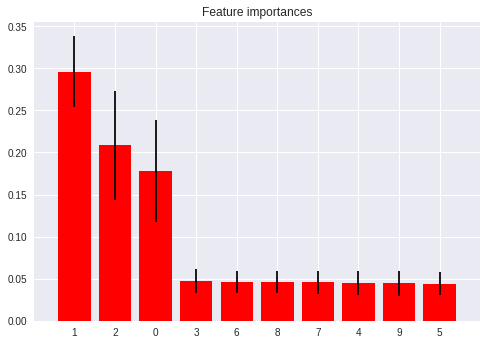

In [8]:
#Feature importances with forests of trees
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Automatically created module for IPython interactive environment
Fitting ExtraTreesClassifier on faces data with 1 cores...
done in 1.457s


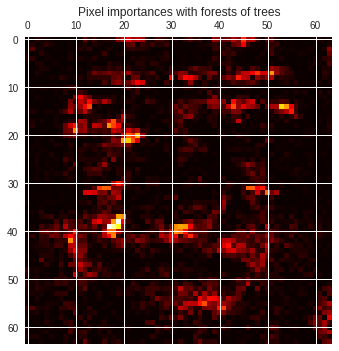

In [9]:
#Pixel importances with a parallel forest of trees
print(__doc__)

from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

# Number of cores to use to perform parallel fitting of the forest model
n_jobs = 1

# Load the faces dataset
data = fetch_olivetti_faces()
X = data.images.reshape((len(data.images), -1))
y = data.target

mask = y < 5  # Limit to 5 classes
X = X[mask]
y = y[mask]

# Build a forest and compute the pixel importances
print("Fitting ExtraTreesClassifier on faces data with %d cores..." % n_jobs)
t0 = time()
forest = ExtraTreesClassifier(n_estimators=1000,
                              max_features=128,
                              n_jobs=n_jobs,
                              random_state=0)

forest.fit(X, y)
print("done in %0.3fs" % (time() - t0))
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()

Automatically created module for IPython interactive environment
C=100.00
Sparsity with L1 penalty: 6.25%
score with L1 penalty: 0.9115
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9098
C=1.00
Sparsity with L1 penalty: 9.38%
score with L1 penalty: 0.9098
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
C=0.01
Sparsity with L1 penalty: 85.94%
score with L1 penalty: 0.8598
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8915


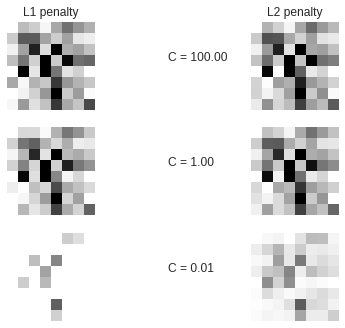

In [10]:
#L1 Penalty and Sparsity in Logistic Regression
print(__doc__)

# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(np.int)


# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()